# 汽车消费城市划分

In [1]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#数据加载
data=pd.read_csv('car_data.csv',encoding='gbk')
train_x=data[['人均GDP','城镇人口比重','交通工具消费价格指数','百户拥有汽车量']]

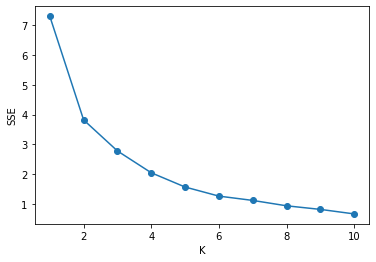

In [3]:
#规范到[0,1]空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)
#使用KMeans聚类
karr=[]
for k in range (1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(train_x)
    karr.append(kmeans.inertia_)
x=range(1,11)
plt.plot(x,karr,'o-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

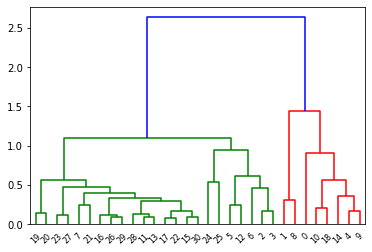

In [4]:
#使用层次聚类
from scipy.cluster.hierarchy import dendrogram,ward
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(linkage='ward',n_clusters=4)
groupid=model.fit_predict(train_x)
linkage_matrix=ward(train_x)
dendrogram(linkage_matrix)
plt.show()

In [5]:
#合并组别
def add_group(id):
    if id==0:
        return 'I类'
    if id==1:
        return 'Ⅱ类'
    if id==2:
        return 'Ⅲ类'
    if id==3:
        return 'Ⅳ类'
data['组别']=groupid
data['组别']=data['组别'].apply(add_group)
print(data)

     地区  人均GDP  城镇人口比重  交通工具消费价格指数  百户拥有汽车量  组别
0    北京   8.05   86.20       95.92    37.71  Ⅱ类
1    天津   8.34   80.50      103.57    20.62  Ⅲ类
2    河北   3.39   45.60       99.03    23.32  I类
3    山西   3.13   49.68       98.96    18.60  I类
4   内蒙古   5.79   56.62       99.11    19.62  Ⅱ类
5    辽宁   5.07   64.05      100.12    11.15  I类
6    吉林   3.84   53.40       97.15    11.24  I类
7   黑龙江   3.28   56.50      100.54     5.29  Ⅳ类
8    上海   8.18   89.30      101.58    18.15  Ⅲ类
9    江苏   6.22   61.90       98.95    23.92  Ⅱ类
10   浙江   5.92   62.30       96.69    33.85  Ⅱ类
11   安徽   2.56   44.80      100.25     9.20  Ⅳ类
12   福建   4.72   58.10      100.75    17.83  I类
13   江西   2.61   45.70      100.91     8.88  Ⅳ类
14   山东   4.71   50.95       98.50    28.12  Ⅱ类
15   河南   2.87   40.57      100.59    14.06  Ⅳ类
16   湖北   3.41   51.83      101.15     9.69  Ⅳ类
17   湖南   2.98   45.10      100.02    12.82  Ⅳ类
18   广东   5.07   66.50       97.55    30.71  Ⅱ类
19   广西   2.52   41.80      102.28    17